In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

In [124]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.

- Country (region) Name of the country.
- Ladder Cantril Ladder is a measure of life satisfaction.
- SD of Ladder Standard deviation of the ladder.
- Positive affect Measure of positive emotion.
- Negative affect Measure of negative emotion.
- Social support The extent to which Social support contributed to the calculation of the Happiness Score.
- Freedom The extent to which Freedom contributed to the calculation of the Happiness Score.
- Corruption The extent to which Perception of Corruption contributes to Happiness Score.
- Generosity The extent to which Generosity contributed to the calculation of the Happiness Score.
- Log of GDP per capita The extent to which GDP contributes to the calculation of the Happiness Score.
- Healthy life expectancy The extent to which Life expectancy contributed to the calculation of the Happiness Score.


Посмотреть первые несколько рядов таблицы

In [88]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

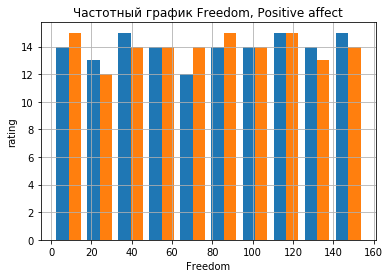

In [114]:
plt.hist([df['Freedom'], df['Positive affect']], 10)

plt.xlabel('Freedom')
plt.ylabel('rating')
plt.title('Частотный график Freedom, Positive affect')
plt.grid(True)
plt.show()

Распределение равномерное (возможно так как значения показателей даны в ранговой системе)

Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [89]:
df.Freedom.isna().sum()

1

In [91]:
df = df.dropna()

In [93]:
df.Freedom.describe()

count    140.000000
mean      78.828571
std       45.108972
min        1.000000
25%       39.750000
50%       79.500000
75%      118.250000
max      155.000000
Name: Freedom, dtype: float64

In [103]:
volume = df.Freedom.max() - df.Freedom.min()
volume

154.0

In [105]:
statistics.pvariance(df.Freedom)

2020.2848979591836

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

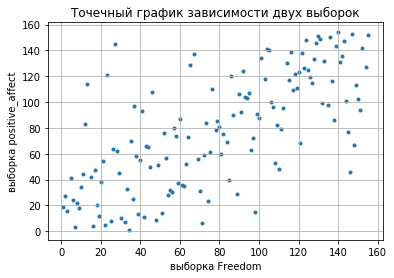

In [94]:
freedom = df.Freedom
positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка positive_affect')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

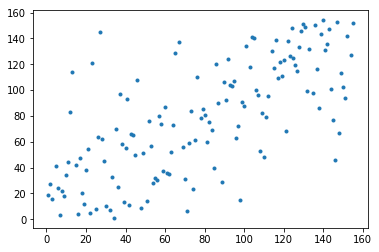

In [95]:
from scipy.stats import pearsonr
x = df['Freedom']
y = df['Positive affect']
plt.scatter(x, y, marker='.')

In [97]:
corr, p_value = pearsonr(x, y)
corr

0.6965670458090686


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [99]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom', 'Positive affect']])

Построить матрицу корреляций для всех колонок таблицы

In [101]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


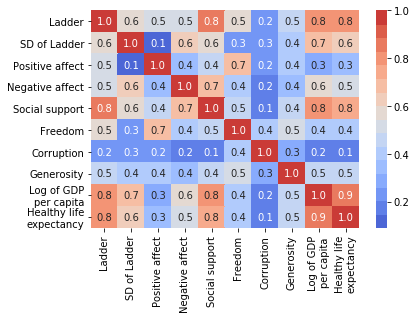

In [102]:
f, ax = plt.subplots()

sns.heatmap(df.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

Загрузить следующую таблицу:

In [120]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df1=pd.read_csv(url)
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

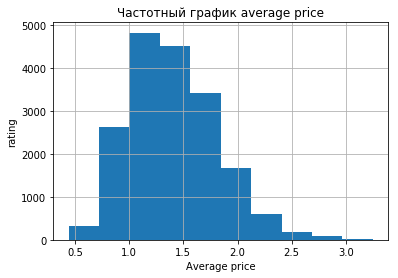

In [121]:
plt.hist(df1['AveragePrice'], 10)

plt.xlabel('Average price')
plt.ylabel('rating')
plt.title('Частотный график average price')
plt.grid(True)
plt.show()

нормальное распределение


Найти корреляцию в следующих колонках:



Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

-0.20831704848788477

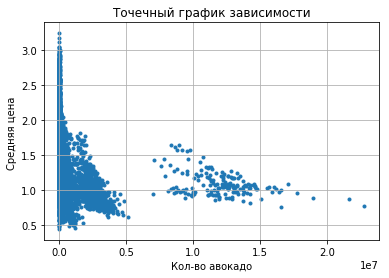

In [123]:
x = df1['4046']
y = df1['AveragePrice']

plt.scatter(x, y, marker = '.')
plt.xlabel('Кол-во авокадо')
plt.ylabel('Средняя цена ')
plt.title('Точечный график зависимости')
plt.grid(True)
corr, p_value = pearsonr (x, y)
corr